In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/d/lestiessam/sms-spam-collection-dataset/spam (1).csv


In [2]:
#Load the Dataset

# File path
df = pd.read_csv('/kaggle/input/d/lestiessam/sms-spam-collection-dataset/spam (1).csv', encoding='latin-1')

# keep only useful columns
df = df[['v1', 'v2']]
df.columns = ['label1', 'text']

df.head()

,label1,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Dataset size: (5572, 2)
Class distribution:
 label1
ham     4825
spam     747
Name: count, dtype: int64


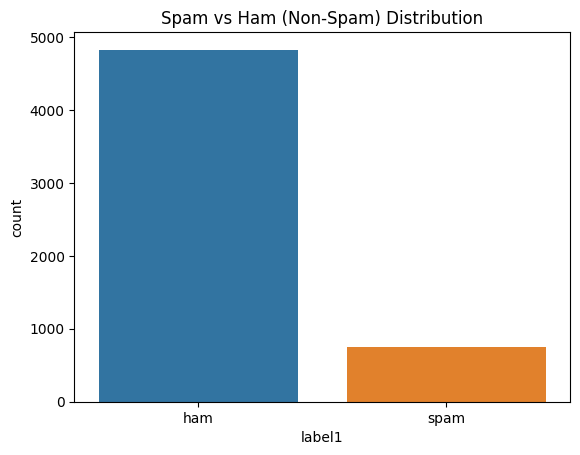

In [3]:
# Explore the Dataset

#Basic statistics
print("Dataset size:", df.shape)
print("Class distribution:\n", df['label1'].value_counts())

# Visualizer class distribution
sns.countplot(data=df, x='label1')
plt.title("Spam vs Ham (Non-Spam) Distribution")
plt.show()

In [4]:
# Encode Labels and Split Data

# Encode 'spam' as 1 and 'ham' as 0
le = LabelEncoder()
df['label_num'] = le.fit_transform(df['label1']) #spam =1, ham=0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['text'],df['label_num'], test_size=0.2, random_state=42)

print("Train size : {}, Test size: {}".format((len(X_train)),(len(X_test))))

Train size : 4457, Test size: 1115


In [5]:
# Build TF-IDF + Naive Bayes Pipeline

# This pipeline first transforms the text using TF-IDF, then applies a Naive Bayes classifier..
model = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words='english')),
    ('clf', MultinomialNB())
])

#Train the model 
model.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('clf', MultinomialNB())])

              precision    recall  f1-score   support

         Ham       0.96      1.00      0.98       965
        Spam       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



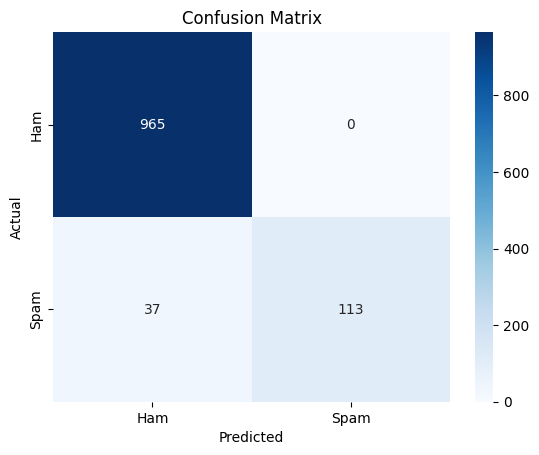

In [6]:
# Evaluate the Model

# Predict on test set
y_pred = model.predict(X_test)

# Print classification metrics
print(classification_report(y_test, y_pred, target_names=['Ham', 'Spam']))

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=['Ham','Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [7]:
# Try custom Email Inputs

# Write your own email below
custom_email = ["Congratulations! You've won a free iphone. Click here to claim your prize",
"You have been selected as one of our luck"]

# Predict
prediction = model.predict(custom_email)
for i, email in enumerate(custom_email):
    label = "Spam" if prediction[i] ==1 else "Ham (Not Spam)"

    print(f"Email {i+1}: {label}")

Email 1: Spam
Email 2: Ham (Not Spam)
